In [1]:
Name= 'Catherine Bui'
Organization= 'Center For Community Innovation'
Project= 'Twitter Displacement Study'

In [1]:
%%time
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import subprocess
from pathlib import Path
import csv
import numpy as np
from io import StringIO
import dask.dataframe as das
import datetime



CPU times: user 7.74 s, sys: 812 ms, total: 8.55 s
Wall time: 12.3 s


# ANALYZING TWITTER TWEETS IN NEW YORK

FIRST PART OF TASKS

1. Compare full set of tweets a census tract level to those with home location to see differences in spatial distribution
    a. Tracts with greater/lesser share of all tweets vs home location tweets
    b. by tract, % of tweets missing home_tract
2. Summarize distribution of tweets by user - # of users with more than 5 tweets in a tract -- compare to overall distribution
3. Using tweets with home location, summary statistics of the share of tweets in a tract in the time period. 


The census of tract is the unit of metric. Home location was determined by: A home location (tract) needs to: Receive at least 10 tweets, Sent from >7 different days, Sent from 8 or more different hours of the day.

If multiple locations satisfy, we take the location with the most tweets as the home location 

The number of rows in the original data is 75368830. 

### READING THE CSV FILE WITH DASK 
1. Clean and prepare the data. We need to rename the columns, drop any missing values, convert any values into its appropriate type to perform calculations, and to collect each calculations such as total tweets into multiple csv files for one final output compilation.

In [2]:
%%time
#file is the original ny raw data, file2 is the power user ny data.
file = "/scratch/public/catherinebui/ny_twitter.csv"
file2 = '/scratch/public/kushk/ny_one_tweet_per_day.csv'
ds = das.read_csv(file)
ds = ds.rename(columns = {'ny_with_homeloc.csv': 'id'})

CPU times: user 224 ms, sys: 8 ms, total: 232 ms
Wall time: 413 ms


# Cleaning and Analyzing with Raw Data

### GROUPING BY TRACT 

First, we group the tweets by tract so we can find the % of missing tracts, count of tweets with specific filters, count of users in tract,etc.

In [3]:
groupbytract= ds.groupby('tract')

In [59]:
#SHOW THE COUNT OF TWEETS PER TRACT
groupbytract.count().head(819)

,id,u_id,lat,lon,date,home_tract,diff_tract
tract,,,,,,,
9.001010e+09,2610,2610,2610,2610,2610,2610,2610
9.001010e+09,4746,4746,4746,4746,4746,4746,4746
9.001010e+09,2953,2953,2953,2953,2953,2953,2953
9.001010e+09,15253,15253,15253,15253,15253,15226,15226
9.001010e+09,11688,11688,11688,11688,11688,11688,11688
9.001010e+09,18220,18220,18220,18220,18220,18219,18219
9.001011e+09,18168,18168,18168,18168,18168,18155,18155
9.001011e+09,3687,3687,3687,3687,3687,3687,3687
9.001011e+09,6458,6458,6458,6458,6458,6458,6458


In [5]:
#Count the total tweets in each tract
idpertract= groupbytract.count().drop(['u_id', 'lat', 'lon',
                                      'home_tract', 'date'], axis =1).reset_index()
idpertract = idpertract[idpertract['tract'] != 0]
idpertract  = idpertract.rename(columns = {'id': 'total_tweets'})

In [34]:
idpertract.head(10)

,tract,id
1,9001010101,2610
2,9001010201,4746
3,9001010202,2953
4,9001010300,15253
5,9001010400,11688
6,9001010500,18220
7,9001010600,18168
8,9001010700,3687
9,9001010800,6458
10,9001010900,9573


In [10]:
idpertract.to_csv('nytract_*.csv')

['nytract_0.csv']

There are 3488 tracts in New York dataset.

2. Show the percentage of missing home tracts per tract (in decimals)

Looking for bias in home location since home location was generated, not given.

In [4]:
#Count the number of tweets in a missing home tract in each tract
nullpertract = groupbytract.apply(lambda x: x.isnull().sum())
nullpertract = nullpertract.drop(['id', 'u_id', 'lat', 'lon', 'tract', 'date'], axis = 1).rename(columns = {'home_tract': 'miss_home_tract'}).reset_index()

/usr/local/linux/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  


In [5]:
nullpertract.to_csv('missing_*.csv')

['missing_000.csv',
 'missing_001.csv',
 'missing_002.csv',
 'missing_003.csv',
 'missing_004.csv',
 'missing_005.csv',
 'missing_006.csv',
 'missing_007.csv',
 'missing_008.csv',
 'missing_009.csv',
 'missing_010.csv',
 'missing_011.csv',
 'missing_012.csv',
 'missing_013.csv',
 'missing_014.csv',
 'missing_015.csv',
 'missing_016.csv',
 'missing_017.csv',
 'missing_018.csv',
 'missing_019.csv',
 'missing_020.csv',
 'missing_021.csv',
 'missing_022.csv',
 'missing_023.csv',
 'missing_024.csv',
 'missing_025.csv',
 'missing_026.csv',
 'missing_027.csv',
 'missing_028.csv',
 'missing_029.csv',
 'missing_030.csv',
 'missing_031.csv',
 'missing_032.csv',
 'missing_033.csv',
 'missing_034.csv',
 'missing_035.csv',
 'missing_036.csv',
 'missing_037.csv',
 'missing_038.csv',
 'missing_039.csv',
 'missing_040.csv',
 'missing_041.csv',
 'missing_042.csv',
 'missing_043.csv',
 'missing_044.csv',
 'missing_045.csv',
 'missing_046.csv',
 'missing_047.csv',
 'missing_048.csv',
 'missing_049.csv',


In [6]:
missing = ['missing_000.csv','missing_001.csv','missing_002.csv','missing_003.csv','missing_004.csv',
 'missing_005.csv','missing_006.csv','missing_007.csv','missing_008.csv','missing_009.csv',
 'missing_010.csv','missing_011.csv','missing_012.csv','missing_013.csv','missing_014.csv', 
 'missing_015.csv','missing_016.csv','missing_017.csv','missing_018.csv', 'missing_019.csv',
 'missing_020.csv','missing_021.csv','missing_022.csv','missing_023.csv','missing_024.csv',
 'missing_025.csv','missing_026.csv','missing_027.csv','missing_028.csv',
 'missing_029.csv','missing_030.csv','missing_031.csv','missing_032.csv','missing_033.csv',
 'missing_034.csv','missing_035.csv','missing_036.csv','missing_037.csv','missing_038.csv',
 'missing_039.csv','missing_040.csv','missing_041.csv','missing_042.csv','missing_043.csv','missing_044.csv','missing_045.csv','missing_046.csv','missing_047.csv','missing_048.csv', 'missing_049.csv',
 'missing_050.csv', 'missing_051.csv','missing_052.csv', 'missing_053.csv', 'missing_054.csv','missing_055.csv', 'missing_056.csv','missing_057.csv',
 'missing_058.csv','missing_059.csv','missing_060.csv', 'missing_061.csv',
 'missing_062.csv','missing_063.csv','missing_064.csv', 'missing_065.csv', 'missing_066.csv','missing_067.csv',
 'missing_068.csv', 'missing_069.csv', 'missing_070.csv', 'missing_071.csv','missing_072.csv', 'missing_073.csv',
 'missing_074.csv', 'missing_075.csv', 'missing_076.csv', 'missing_077.csv','missing_078.csv', 'missing_079.csv','missing_080.csv','missing_081.csv','missing_082.csv','missing_083.csv',
 'missing_084.csv', 'missing_085.csv','missing_086.csv','missing_087.csv','missing_088.csv',
 'missing_089.csv', 'missing_090.csv','missing_091.csv','missing_092.csv','missing_093.csv','missing_094.csv','missing_095.csv','missing_096.csv',
 'missing_097.csv', 'missing_098.csv','missing_099.csv','missing_100.csv','missing_101.csv',
 'missing_102.csv','missing_103.csv','missing_104.csv','missing_105.csv',
 'missing_106.csv','missing_107.csv','missing_108.csv','missing_109.csv','missing_110.csv','missing_111.csv', 'missing_112.csv','missing_113.csv','missing_114.csv','missing_115.csv',
 'missing_116.csv','missing_117.csv', 'missing_118.csv','missing_119.csv',
 'missing_120.csv', 'missing_121.csv','missing_122.csv','missing_123.csv','missing_124.csv',
 'missing_125.csv','missing_126.csv', 'missing_127.csv', 'missing_128.csv','missing_129.csv',
 'missing_130.csv','missing_131.csv','missing_132.csv']
pd.concat(pd.read_csv(f) for f in missing).to_csv('missing.csv')

## GROUPING BY ID
1. Count the number of tweets per user. Create a summary statistics

In [5]:
#Groupby user id function
groupbyuid = ds.groupby('u_id')

In [9]:
#Show first 10 rows of tweets per user count
groupbyuid.count().drop(['lat', 'lon', 'home_tract', 
                          'tract', 'diff_tract', 'date'], axis =1).head(10)

,id
u_id,
1.668805e-308,104
1.668805e-308,953
1.668805e-308,1395
1.668805e-308,229
1.668805e-308,1286
1.668805e-308,264
1.668805e-308,760
1.668805e-308,419
1.668805e-308,494


## Per tract, how many users have more than 5 tweets? 
1. Group by tract and group by u_id. 
2. Then, filter u_id with tweets more than 5. 
3. Reset the index
4. Group by tract and get the count of users with more than 5 tweets

In [56]:
#Groupby tract and user id and count id
uidt = ds.groupby(['tract', 'u_id']).count()

In [ ]:
#Show the first 10 rows of the users with more than 5 tweets in each tract
uidt[uidt['id'] > 5].head(10)

In [6]:
#Unique count in each tract specifically the unique users in each tract
totalusers = groupbytract.apply(lambda x: x.nunique())
totalusers = totalusers.drop(['tract', 'id', 'lat', 'lon', 'date', 'home_tract'], axis = 1).reset_index()
totalusers = totalusers.rename(columns = {'u_id': 'total_users'})

/usr/local/linux/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  """Entry point for launching an IPython kernel.


In [7]:
totalusers.to_csv('totalusers_*.csv')

['totalusers_000.csv',
 'totalusers_001.csv',
 'totalusers_002.csv',
 'totalusers_003.csv',
 'totalusers_004.csv',
 'totalusers_005.csv',
 'totalusers_006.csv',
 'totalusers_007.csv',
 'totalusers_008.csv',
 'totalusers_009.csv',
 'totalusers_010.csv',
 'totalusers_011.csv',
 'totalusers_012.csv',
 'totalusers_013.csv',
 'totalusers_014.csv',
 'totalusers_015.csv',
 'totalusers_016.csv',
 'totalusers_017.csv',
 'totalusers_018.csv',
 'totalusers_019.csv',
 'totalusers_020.csv',
 'totalusers_021.csv',
 'totalusers_022.csv',
 'totalusers_023.csv',
 'totalusers_024.csv',
 'totalusers_025.csv',
 'totalusers_026.csv',
 'totalusers_027.csv',
 'totalusers_028.csv',
 'totalusers_029.csv',
 'totalusers_030.csv',
 'totalusers_031.csv',
 'totalusers_032.csv',
 'totalusers_033.csv',
 'totalusers_034.csv',
 'totalusers_035.csv',
 'totalusers_036.csv',
 'totalusers_037.csv',
 'totalusers_038.csv',
 'totalusers_039.csv',
 'totalusers_040.csv',
 'totalusers_041.csv',
 'totalusers_042.csv',
 'totaluser

In [7]:
totalusers = ['totalusers_000.csv',
 'totalusers_001.csv', 'totalusers_002.csv','totalusers_003.csv', 'totalusers_004.csv','totalusers_005.csv','totalusers_006.csv',
 'totalusers_007.csv', 'totalusers_008.csv', 'totalusers_009.csv', 'totalusers_010.csv', 'totalusers_011.csv',
 'totalusers_012.csv', 'totalusers_013.csv','totalusers_014.csv','totalusers_015.csv', 'totalusers_016.csv', 'totalusers_017.csv',
 'totalusers_018.csv','totalusers_019.csv', 'totalusers_020.csv','totalusers_021.csv','totalusers_022.csv','totalusers_023.csv','totalusers_024.csv',
 'totalusers_025.csv', 'totalusers_026.csv','totalusers_027.csv','totalusers_028.csv','totalusers_029.csv','totalusers_030.csv','totalusers_031.csv', 'totalusers_032.csv',
 'totalusers_033.csv', 'totalusers_034.csv','totalusers_035.csv',
 'totalusers_036.csv','totalusers_037.csv', 'totalusers_038.csv','totalusers_039.csv', 'totalusers_040.csv', 'totalusers_041.csv', 'totalusers_042.csv',
 'totalusers_043.csv', 'totalusers_044.csv', 'totalusers_045.csv',
 'totalusers_046.csv','totalusers_047.csv','totalusers_048.csv','totalusers_049.csv', 'totalusers_050.csv','totalusers_051.csv',
 'totalusers_052.csv', 'totalusers_053.csv', 'totalusers_054.csv', 'totalusers_055.csv',
 'totalusers_056.csv', 'totalusers_057.csv','totalusers_058.csv','totalusers_059.csv', 'totalusers_060.csv','totalusers_061.csv',
 'totalusers_062.csv','totalusers_063.csv','totalusers_064.csv', 'totalusers_065.csv','totalusers_066.csv','totalusers_067.csv','totalusers_068.csv','totalusers_069.csv',
 'totalusers_070.csv','totalusers_071.csv','totalusers_072.csv', 'totalusers_073.csv','totalusers_074.csv', 'totalusers_075.csv', 'totalusers_076.csv',
 'totalusers_077.csv', 'totalusers_078.csv', 'totalusers_079.csv', 'totalusers_080.csv',
 'totalusers_081.csv', 'totalusers_082.csv', 'totalusers_083.csv', 'totalusers_084.csv', 'totalusers_085.csv', 'totalusers_086.csv','totalusers_087.csv', 'totalusers_088.csv',
 'totalusers_089.csv', 'totalusers_090.csv', 'totalusers_091.csv','totalusers_092.csv', 'totalusers_093.csv','totalusers_094.csv', 'totalusers_095.csv',
 'totalusers_096.csv','totalusers_097.csv','totalusers_098.csv','totalusers_099.csv', 'totalusers_100.csv','totalusers_101.csv','totalusers_102.csv','totalusers_103.csv','totalusers_104.csv',
 'totalusers_105.csv','totalusers_106.csv','totalusers_107.csv','totalusers_108.csv','totalusers_109.csv',
 'totalusers_110.csv','totalusers_111.csv','totalusers_112.csv', 'totalusers_113.csv','totalusers_114.csv','totalusers_115.csv',
 'totalusers_116.csv','totalusers_117.csv','totalusers_118.csv','totalusers_119.csv','totalusers_120.csv','totalusers_121.csv',
 'totalusers_122.csv','totalusers_123.csv', 'totalusers_124.csv',
 'totalusers_125.csv','totalusers_126.csv','totalusers_127.csv','totalusers_128.csv', 'totalusers_129.csv', 'totalusers_130.csv','totalusers_131.csv', 'totalusers_132.csv']

pd.concat(pd.read_csv(f) for f in totalusers).to_csv('totalusers.csv')

In [51]:
totalusers.head(10)

,tract,total_users
0,3.400301e+10,869
1,3.401302e+10,798
2,3.402300e+10,3423
3,3.403903e+10,698
4,3.600501e+10,1474
5,3.600502e+10,289
6,3.600503e+10,434
7,3.606100e+10,2405
8,3.606102e+10,1195
9,3.608100e+10,289


In [45]:
##We only want to look at u_id column. Ignore the other columns. 
uidt[uidt['id'] > 5].reset_index().groupby(['tract']).count().head(819)

,u_id,id,lat,lon,date,home_tract,diff_tract
tract,,,,,,,
9.001010e+09,43,43,43,43,43,43,43
9.001010e+09,68,68,68,68,68,68,68
9.001010e+09,54,54,54,54,54,54,54
9.001010e+09,162,162,162,162,162,162,162
9.001010e+09,126,126,126,126,126,126,126
9.001010e+09,225,225,225,225,225,225,225
9.001011e+09,328,328,328,328,328,328,328
9.001011e+09,82,82,82,82,82,82,82
9.001011e+09,116,116,116,116,116,116,116


In [8]:
uidt[uidt['id'] > 5].reset_index().groupby(['tract']).count()['u_id'].describe().compute()

count    3480.000000
mean      287.092816
std       508.430123
min         1.000000
25%        84.000000
50%       165.000000
75%       293.000000
max      7059.000000
dtype: float64

In [61]:
#Count the users with at least 5 tweets in each tract and convert it to a csv
id5 = uidt[uidt['id'] >= 5].reset_index().groupby(['tract']).count().reset_index()
id5 = id5.rename(columns = {'u_id': 'userwith5_count'})
id5 = id5.drop(['id', 'lat', 'lon', 'date', 'home_tract'], axis = 1)

In [12]:
id5.head(10)

,tract,u_id,id,lat,lon,date,home_tract
0,9.001010e+09,43,43,43,43,43,43
1,9.001010e+09,68,68,68,68,68,68
2,9.001010e+09,54,54,54,54,54,54
3,9.001010e+09,162,162,162,162,162,162
4,9.001010e+09,126,126,126,126,126,126
5,9.001010e+09,225,225,225,225,225,225
6,9.001011e+09,328,328,328,328,328,328
7,9.001011e+09,82,82,82,82,82,82
8,9.001011e+09,116,116,116,116,116,116
9,9.001011e+09,128,128,128,128,128,128


In [62]:
id5.to_csv('id5_*.csv')

['id5_0.csv']

In [67]:
#count of tweets sent from home (local tweets) in each tract
hometweets = ds[ds['home_tract'] == ds['tract']].groupby('tract').count().drop(['u_id', 'lat', 'lon',
                                      'home_tract', 'date'], axis =1).reset_index()
hometweets = hometweets.rename(columns = {'id': 'tweets_sent_from_home'})
hometweets.to_csv('hometweets_*.csv')

['hometweets_0.csv']

# Adding Time as a Variable

SECOND ROUND OF ANALYSIS
1. Keeping tract in mind, what day and time are tweets sent often?
2. Comparing tract == home_tract, are there a correlation with day/time to home_tract?
3. Calculate the odds ratio

We didn't drop the home tract initially because we needed to calculate the % tweets with missing home location in each tract. However, in this round of analysis, we drop all null values in column 'home_tract' so that we can begin aggregating and counting real numbers.

In [10]:
ds=ds.dropna(subset = ['home_tract'])

### Hour Breakdown

In [4]:
#The hour is given by the last two digits of the column 'date'
#We group by tract and hour and count the tweets sent in each hour in each tract
ds['hour'] = ds['date'].str[11:13]
hour_count = ds.groupby(['tract', 'hour']).aggregate({'id': 'count'})
hour_count.rename(columns = {'id': 'count'})
hour_helper = ds.groupby(['tract']).aggregate({'id': 'count'})

In [22]:
#An example displayed of what to expect
hour_count.head(10)

id
tract        hour     
9.001010e+09 00    209
             01    237
             02    208
             03    144
             04    105
             05     53
             06     35
             07     23
             08     28
             09     24

In [ ]:
#We categorize and pivot the table so that the hours will be column
#names and ready for our output file
hour_count = hour_count.reset_index()
hour_count=hour_count.categorize(columns = ['hour'])
hour_count = hour_count.pivot_table(values = 'id',
                                    columns = 'hour', index= 'tract')

In [14]:
hour_count.to_csv('hour_count_*.csv')

['hour_count_0.csv']

### Day Breakdown

■       Days (Mon-Sun) – seven time periods

The weekday method of the datetime object will return 0 if it's Monday and 6 if it's Sunday so on.

In [5]:
#We create a datetime object for the date
ds['date_helper'] = ds['date'].str[0:10]
ds['weekday'] = ds.date_helper.map(lambda x: pd.to_datetime(x).weekday() if x != 'foo' else np.nan)

In [15]:
ds.head(10)

,id,u_id,lat,lon,date,tract,home_tract,date_helper,weekday
0,2.117852e-293,1.668805e-308,40.636800,-73.659319,2012-07-26T00:49:21Z,3.605941e+10,3.605941e+10,2012-07-26,3
1,2.117846e-293,1.668805e-308,40.778059,-73.954124,2012-07-26T00:49:15Z,3.606101e+10,3.608101e+10,2012-07-26,3
2,2.117863e-293,1.668805e-308,40.918340,-73.804538,2012-07-26T00:49:30Z,3.611901e+10,3.611901e+10,2012-07-26,3
3,2.117864e-293,1.668805e-308,40.923364,-74.146670,2012-07-26T00:49:31Z,3.403118e+10,3.403118e+10,2012-07-26,3
4,2.117863e-293,1.668805e-308,40.694654,-73.733507,2012-07-26T00:49:31Z,3.608106e+10,3.608106e+10,2012-07-26,3
5,2.117883e-293,1.668805e-308,40.755179,-73.976723,2012-07-26T00:49:47Z,3.606101e+10,3.606102e+10,2012-07-26,3
6,2.117884e-293,1.668805e-308,40.771426,-73.973501,2012-07-26T00:49:48Z,3.606101e+10,3.606102e+10,2012-07-26,3
7,2.117892e-293,1.668805e-308,40.650541,-73.931422,2012-07-26T00:49:55Z,3.604709e+10,3.604712e+10,2012-07-26,3
8,2.117898e-293,1.668805e-308,40.622028,-74.332462,2012-07-26T00:50:00Z,3.403904e+10,3.403904e+10,2012-07-26,3
9,2.117896e-293,1.668805e-308,40.777575,-74.353625,2012-07-26T00:49:58Z,3.401302e+10,3.401300e+10,2012-07-26,3


In [6]:
#Count of tweets in each day from Monday to Sunday in each tract
weekday_count = ds.groupby(['tract', 'weekday']).aggregate({'id': 'count'})
weekday_count = weekday_count.reset_index()


In [8]:
weekday_count.head(7)

,tract,weekday,id
0,9.001010e+09,0,321
1,9.001010e+09,1,349
2,9.001010e+09,2,307
3,9.001010e+09,3,377
4,9.001010e+09,4,377
5,9.001010e+09,5,428
6,9.001010e+09,6,451


In [7]:
weekday_count = weekday_count.categorize(columns = ['weekday'])
weekday_count = weekday_count.pivot_table(values = 'id',
                                         columns = 'weekday',
                                         index = 'tract')

In [8]:
weekday_count.to_csv("weekday_count_*.csv")

['weekday_count_0.csv']

### Weekday and Weekend Breakdown
Disclaimer: the 'weekday' column above and weekday_count were to calculate the numbers in each day from Monday to Sunday, but the analysis below is specifically for weekday and weekend as defined here:

■ weekday (Mon-Fri (until 18:00)); weekend (starting 18:00 on Friday until 4:00 on Monday)

Thus, the next function will separate the day and hour into the correct categories.

In [6]:
#Monday is 0 and Sunday is 6
valuesweekday= [1,2,3]
valuesweekend = [6, 5]
# time = ds[['weekday', 'hour']]

before_18 = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', 
             '10', '11', '12', '13', '14', '15', '16', '17', '18']

def weekday(row):
    if row['weekday'] in valuesweekday:
        return 1
    elif row['weekday']== 0 & (row['hour'] not in ['00', '01', '02', '03']):
        return 1
    elif row['weekday'] == 4 & (row['hour'] in before_18):
        return 1
    else:
        return 0
ds['WEEKDAY'] = ds.apply(lambda x: weekday(x), axis = 1, meta = 'float64')

In [7]:
weekday_sum = ds.groupby(['tract', 'WEEKDAY']).aggregate({'id': 'count'})
weekday_sum = weekday_sum.reset_index()

In [10]:
weekday_sum.head(3)

,tract,WEEKDAY,id
0,9.001010e+09,0,1026
1,9.001010e+09,1,1584
2,9.001010e+09,0,1482


In [8]:
%%time
weekday_sum = weekday_sum.categorize(columns  = ['WEEKDAY'])
weekday_sum = weekday_sum.pivot_table(values = 'id', columns = 'WEEKDAY', index = 'tract')

CPU times: user 5h 37min 36s, sys: 20min 8s, total: 5h 57min 45s
Wall time: 5h 29min 13s


In [9]:
%%time
weekday_sum.to_csv("weekday_sum_*.csv")

CPU times: user 6h 30min 1s, sys: 35min 4s, total: 7h 5min 5s
Wall time: 6h 20min 22s


['weekday_sum_0.csv']

### Daytime and Nighttime Breakdown
day and night are defined as:
■       day (4:00 – 18:00), evening/night (18:00 to 04:00)

In [4]:
dayvalues = ['04', '05', '06', '07', '08', '09', '10', '11', '12', '13','14', '15', '16', '17', '18']
def day(row):
    if row['hour'] in dayvalues:
        return 1
    else:
        return 0
ds['daytime'] = ds.apply(lambda x: day(x), axis =1, meta = 'float64')

In [25]:
daytime_count = ds.groupby(['tract', 'daytime']).aggregate({'id': 'count'})
daytime_count = daytime_count.reset_index()
daytime_count = daytime_count.categorize(columns = ['daytime'])
daytime_count = daytime_count.pivot_table(values = 'id', columns= 'daytime', index = 'tract')


In [ ]:
daytime_count.to_csv('daytime_count_*.csv')

## GEOGRAPHICAL ANALYSIS


GEO TAG: local, neighbors, (non-local & non-neighbors)

-- Number of Tweets by GEOGRAPHY

-- Geog (3 categories) * Days (7 categories) = 21 combo-categories

-- Geog (3 categories) * Time of Day (2 categories) = 6 combo-categories

-- Geog (3 categories) * Weekday/Weekend (2 categories) = 6 combo-categories

-- Geog (3 categories) * Time of Day (2 categories)  * Weekday/Weekend (2 categories)  = 12 combo-categories

Local is defined as tweets sent from home. Non-local is defined as tweets sent from other tracts, but not neighboring tracts. Non-neighbor is defined as tweets sent from neighboring tracts. The New York twitter raw data actually include tweets from New Jersey, Connecticut, and New York.

In [12]:
#Include NY, NJ, and CT nearest neighbors of each tract
ny_nn= pd.read_csv('ny_nearestneighbor_output_meters.csv')
nj_nn = pd.read_csv('nj_nearestneighbor_output_meters.csv')
ct_nn = pd.read_csv('ct_nearestneighbor_output_meters.csv')

In [13]:
nn = pd.concat([ny_nn, nj_nn, ct_nn])
##a function that takes in the SRC_GEOID and returns an array of NBR_GEOID
def neighbors(src):
    for i in nn['SRC_GEOID'].unique():
        if i == src:
            table=nn[nn['SRC_GEOID'] == i]
            return np.array(table['NBR_GEOID'])
    return []
neighbors(36081003900)

array([36081003700, 36081004500, 36081008500])

In [14]:
#We create a dictionary of tract number and a list of its neighboring tract
n_ = []
for i in nn['SRC_GEOID'].unique():
    n_.append(neighbors(i))
nn = pd.DataFrame(nn['SRC_GEOID'].unique()) 
nn['neighbors'] = n_
nn = nn.rename(columns = {0: 'SRC_GEOID'})
neighbormap = dict(zip(nn['SRC_GEOID'], nn['neighbors']))

### NEIGHBORS

In the next lines of codes, we will be counting the number of neighboring tweets, neighboring tweets given hour, day, weekday, and  daytime/nighttime.

It's important to clean up the data before starting. This time, we will be removing null values of 'tract' column. We had also removed the null values in 'home_tract' previously. If you're starting this portion without doing the Time analysis breakdown. The code is provided below. Just uncomment it. We also convert the float values of 'tract' and 'home_tract columns into int values to match with the neighbormap dictionary. We will use this cleanup for Local and Non-Neighbor Analysis as well.

In [11]:
#ds = ds.dropna(subset = ['home_tract'])
ds = ds.dropna(subset= ['tract'])
ds['tract'] = ds['tract'].astype('int')
ds['home_tract'] = ds['home_tract'].astype('int')

The function below 'neighbor_check' uses the neighbormap where the keys are home_tract values. We then check if the tract matches the home_tract, if tract matches a neighboring tract of the home_tract, and if home_tract is in the neighbors. 
Thus, it also sets all the tweets from outside of the New York region as 0.

In [23]:
def neighbor_check(x):
    if np.any(neighbormap.get(x['home_tract']) != None): 
        if x['tract'] in neighbormap.get(x['home_tract']):
            return 1
        else:
            return 0
    else:
        return 0

In [24]:
#apply neighbor_check to the dataset and create a new column 'neighbor'
ds['neighbor'] = ds.apply(lambda x: neighbor_check(x), axis = 1, meta = 'float64')
#eliminate all the tweets from outside of the New York region
ds= ds[(ds["tract"].isin(neighbormap.keys())) & (ds["home_tract"].isin(neighbormap.keys()))]

In [108]:
ds.head(3)

,id,u_id,lat,lon,date,tract,home_tract,neighbor
0,2.117852e-293,1.668805e-308,40.636800,-73.659319,2012-07-26T00:49:21Z,36059413002,36059412200,1
1,2.117846e-293,1.668805e-308,40.778059,-73.954124,2012-07-26T00:49:15Z,36061014601,36081005100,0
2,2.117863e-293,1.668805e-308,40.918340,-73.804538,2012-07-26T00:49:30Z,36119005300,36119005300,0


In [19]:
neighbor = ds[ds['neighbor'] == 1]
neighbor_count = neighbor.groupby(['tract']).aggregate({'id': 'count'})
neighbor_count = neighbor_count.reset_index()
neighbor_count = neighbor_count.rename(columns = {'id': 'neighbor_tweets'})

In [107]:
%%time
neighbor_count.to_csv('neighbor_count_*.csv')

CPU times: user 22h 40min, sys: 1min 19s, total: 22h 41min 20s
Wall time: 22h 3min 46s


['neighbor_count_0.csv']

In [17]:
%%time
neighbor_count.to_csv('neighbor_count_*.csv')

CPU times: user 1d 8h 51min 36s, sys: 3h 5min 2s, total: 1d 11h 56min 39s
Wall time: 1d 1h 55min 28s


['neighbor_count_0.csv']

In [20]:
neighbor['hour'] = neighbor['date'].str[11:13]
neighbor['date_helper'] = neighbor['date'].str[0:10]
neighbor['day'] = neighbor.date_helper.map(
    lambda x: pd.to_datetime(x).weekday() if x != 'foo' else np.nan)
valuesweekday= [1,2,3]
valuesweekend = [6, 5]
# time = ds[['weekday', 'hour']]

before_18 = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', 
             '10', '11', '12', '13', '14', '15', '16', '17', '18']

def neighbor_week_day(row):
    if row['day'] in valuesweekday:
        return 1
    elif row['day']== 0 & (row['hour'] not in ['00', '01', '02', '03']):
        return 1
    elif row['day'] == 4 & (row['hour'] in before_18):
        return 1
    else:
        return 0
neighbor['WEEKDAY'] = neighbor.apply(lambda x: neighbor_week_day(x), axis = 1, meta = 'float64')

In [21]:
neighbor_weekday_sum = neighbor.groupby(['tract', 'WEEKDAY']).aggregate({'id': 'count'})
neighbor_weekday_sum = neighbor_weekday_sum.reset_index()
neighbor_weekday_sum  = neighbor_weekday_sum.categorize(columns = ['WEEKDAY'])

In [22]:
%%time
neighbor_weekday_sum = neighbor_weekday_sum.pivot_table(
    values = 'id', columns = 'WEEKDAY', index = 'tract')

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 22.8 ms


In [23]:
%%time
neighbor_weekday_sum.to_csv("neighbor_weekday_sum_*.csv")

CPU times: user 8h 59min 54s, sys: 16min 48s, total: 9h 16min 42s
Wall time: 8h 48min 41s


['neighbor_weekday_sum_0.csv']

In [19]:
dayvalues = ['04', '05', '06', '07', '08', '09', '10', '11', '12', '13','14', '15', '16', '17', '18']
def neighbor_day(row):
    if row['hour'] in dayvalues:
        return 1
    else:
        return 0
neighbor['daytime'] = neighbor.apply(lambda x: neighbor_day(x), axis =1, meta = 'float64')

In [20]:
%%time
#GROUPING BY DAYTIME/NIGHTIME
neighbor_daytime_count = neighbor.groupby(['tract', 'daytime']).aggregate({'id': 'count'})
neighbor_daytime_count = neighbor_daytime_count.reset_index()
neighbor_daytime_count = neighbor_daytime_count.categorize(columns = ['daytime'])
neighbor_daytime_count = neighbor_daytime_count.pivot_table(
    values = 'id', columns= 'daytime', index = 'tract')

CPU times: user 3h 43min 27s, sys: 2min 58s, total: 3h 46min 25s
Wall time: 3h 37min 19s


In [21]:
%%time
neighbor_daytime_count.to_csv('neighbor_daytime_count_*.csv')

CPU times: user 3h 43min 12s, sys: 2min 58s, total: 3h 46min 10s
Wall time: 3h 37min 10s


['neighbor_daytime_count_0.csv']

### LOCAL

In [11]:
%%time
#counting the number of tweets in local home_tract
local = ds[ds['tract'] == ds['home_tract']]
local_count = local.groupby(['tract']).aggregate({'id': 'count'})
local_count = local_count.reset_index()
local_count = local_count.rename(columns = {'id': 'local_tweets'})

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 25.2 ms


In [ ]:
local_count.to_csv('local_count_*.csv')

In [12]:
%%time
#GROUPING BY HOUR
local['hour'] = local['date'].str[11:13]
local_hour_count = local.groupby(['tract', 'hour']).aggregate({'id': 'count'})
local_hour_count = local_hour_count.reset_index()

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 28.5 ms


In [ ]:
local_hour_count = local_hour_count.categorize(columns = ['hour'])
local_hour_count = local_hour_count.pivot_table(values = 'id',
                                    columns = 'hour', index= 'tract')

In [13]:
local_hour_count.to_csv('local_hour_count_*.csv')

['local_hour_count_0.csv']

In [13]:
local['date_helper'] = ds['date'].str[0:10]
local['day'] = local.date_helper.map(
    lambda x: pd.to_datetime(x).weekday() if x != 'foo' else np.nan)

In [14]:
%%time
#GROUPING BY DAY
local_day_count = local.groupby(['tract', 'day']).aggregate({'id': 'count'})
local_day_count = local_day_count.reset_index()
local_day_count = local_day_count.categorize(columns = ['day'])
local_day_count = local_day_count.pivot_table(values = 'id',
                                         columns = 'day',
                                         index = 'tract')

CPU times: user 2h 59min 35s, sys: 17min 44s, total: 3h 17min 19s
Wall time: 2h 51min 5s


In [15]:
local_day_count.to_csv('local_day_count_*.csv')

['local_day_count_0.csv']

In [14]:
valuesweekday= [1,2,3]
valuesweekend = [6, 5]
# time = ds[['weekday', 'hour']]

before_18 = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', 
             '10', '11', '12', '13', '14', '15', '16', '17', '18']

def week_day(row):
    if row['day'] in valuesweekday:
        return 1
    elif row['day']== 0 & (row['hour'] not in ['00', '01', '02', '03']):
        return 1
    elif row['day'] == 4 & (row['hour'] in before_18):
        return 1
    else:
        return 0
local['WEEKDAY'] = local.apply(lambda x: week_day(x), axis = 1, meta = 'float64')

In [ ]:
%%time
#GROUPING BY WEEKDAY
# local['WEEKDAY'] = local.apply(lambda x: weekday(x), axis = 1, meta = 'float64')
local_weekday_sum = local.groupby(['tract', 'WEEKDAY']).aggregate({'id': 'count'})
local_weekday_sum = local_weekday_sum.reset_index()
local_weekday_sum = local_weekday_sum.categorize(columns = ['WEEKDAY'])


In [ ]:
local_weekday_sum = local_weekday_sum.pivot_table(
    values = 'id', columns = 'WEEKDAY', index = 'tract')
local_weekday_sum = local_weekday_sum.rename(
    columns = {'0': 'local_weekend_oddratio', '1': 'local_weekday_oddratio'})

In [ ]:
%%time
local_weekday_sum.to_csv("local_weekday_sum_*.csv")

In [17]:
dayvalues = ['04', '05', '06', '07', '08', '09', '10', '11', '12', '13','14', '15', '16', '17', '18']
def localday(row):
    if row['hour'] in dayvalues:
        return 1
    else:
        return 0
local['daytime'] = local.apply(lambda x: localday(x), axis =1, meta = 'float64')

In [18]:
%%time
#GROUPING BY DAYTIME/NIGHTIME
# local['daytime'] = local.apply(lambda x: day(x), axis =1, meta = 'float64')
local_daytime_count = local.groupby(['tract', 'daytime']).aggregate({'id': 'count'})
local_daytime_count = local_daytime_count.reset_index()
local_daytime_count = local_daytime_count.categorize(columns = ['daytime'])
local_daytime_count = local_daytime_count.pivot_table(
    values = 'id', columns= 'daytime', index = 'tract')

CPU times: user 4h 12min 8s, sys: 14min 50s, total: 4h 26min 59s
Wall time: 4h 2min 22s


In [19]:
%%time
local_daytime_count.to_csv('local_daytime_count_*.csv')

CPU times: user 4h 13min 33s, sys: 15min 21s, total: 4h 28min 55s
Wall time: 4h 3min 50s


['local_daytime_count_0.csv']

### NONLOCAL

In [25]:
%%time
#counting the number of tweets 
#where the home_tract isn't local or a neighboring tract
other = ds[(ds['neighbor'] == 0) & (ds['tract'] != ds['home_tract'])]
other_count = other.groupby(['tract']).aggregate({'id': 'count'})
other_count = other_count.reset_index()
other_count = other_count.rename(columns = {'id': 'other_tweets'})

CPU times: user 32 ms, sys: 4 ms, total: 36 ms
Wall time: 33.8 ms


In [ ]:
%%time
other_count.to_csv('other_count_*.csv')

In [ ]:
#GROUPING BY HOUR
%%time
other['hour'] = other['date'].str[11:13]
other_hour_count = other.groupby(['tract', 'hour']).aggregate({'id': 'count'})
other_hour_count = other_hour_count.reset_index()

In [ ]:
%%time
other_hour_count = other_hour_count.categorize(columns = ['hour'])
other_hour_count = other_hour_count.pivot_table(values = 'id',
                                    columns = 'hour', index= 'tract')

In [ ]:
%%time
other_hour_count.to_csv('other_hour_count_*.csv')

In [ ]:
%%time
#GROUPING BY DAY
other['date_helper'] = other['date'].str[0:10]
other['day'] = local.date_helper.map(
    lambda x: pd.to_datetime(x).weekday() if x != 'foo' else np.nan)
other_day_count = other.groupby(['tract', 'day']).aggregate({'id': 'count'})
other_day_count = other_day_count.reset_index()

In [ ]:
%%time
other_day_count = other_day_count.categorize(columns = ['day'])
other_day_count = other_day_count.pivot_table(values = 'id',
                                         columns = 'day',
                                         index = 'tract')

In [ ]:
%%time
other_day_count.to_csv('other_day_count_*.csv')

In [ ]:
valuesweekday= [1,2,3]
valuesweekend = [6, 5]
# time = ds[['weekday', 'hour']]

before_18 = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', 
             '10', '11', '12', '13', '14', '15', '16', '17', '18']

def other_weekday(row):
    if row['day'] in valuesweekday:
        return 1
    elif row['day']== 0 & (row['hour'] not in ['00', '01', '02', '03']):
        return 1
    elif row['day'] == 4 & (row['hour'] in before_18):
        return 1
    else:
        return 0

In [ ]:
%%time
#GROUPING BY WEEKDAY
other['WEEKDAY'] = other.apply(lambda x: other_weekday(x), axis = 1, meta = 'float64')
other_weekday_sum = other.groupby(['tract', 'WEEKDAY']).aggregate({'id': 'count'})
other_weekday_sum = other_weekday_sum.reset_index()
other_weekday_sum = other_weekday_sum.categorize(columns  = ['WEEKDAY'])
other_weekday_sum = other_weekday_sum.pivot_table(
    values = 'id', columns = 'WEEKDAY', index = 'tract')
other_weekday_sum = other_weekday_sum.rename(
    columns = {'0': 'other_weekend_oddratio', '1': 'other_weekday_oddratio'})

In [ ]:
other_weekday_sum.to_csv("other_weekday_sum_*.csv")

In [ ]:
dayvalues = ['04', '05', '06', '07', '08', '09', '10', '11', '12', '13','14', '15', '16', '17', '18']
def other_day(row):
    if row['hour'] in dayvalues:
        return 1
    else:
        return 0

In [ ]:
#GROUPING BY DAYTIME/NIGHTIME
other['daytime'] = other.apply(lambda x: other_day(x), axis =1, meta = 'float64')
other_daytime_count = other.groupby(
    ['tract', 'daytime']).aggregate({'id': 'count'})
other_daytime_count = other_daytime_count.reset_index()
other_daytime_count = other_daytime_count.categorize(columns = ['daytime'])
other_daytime_count = other_daytime_count.pivot_table(
    values = 'id', columns= 'daytime', index = 'tract')

In [ ]:
other_daytime_count.to_csv('other_daytime_count_*.csv')

# ORGANIZING THE OUTPUT FILE

Include all the data from above and compiling it into one csv file

In [3]:
output = pd.read_csv('nytract_0.csv')
missingcsv = pd.read_csv('missing.csv')
id5csv = pd.read_csv('id5_0.csv')
totaluserscsv = pd.read_csv('totalusers.csv')
hometract = pd.read_csv('tweetsh_0.csv')
hometweets = pd.read_csv('hometweets_0.csv')
hourcsv = pd.read_csv('hour_count_0.csv')
weekdaycsv = pd.read_csv('weekday_count_0.csv')
weekday_or_weekend = pd.read_csv('weekday_sum_0.csv')
daytime_or_night = pd.read_csv('daytime_count_0.csv')
localcsv= pd.read_csv('local_count_0.csv')
local_hour = pd.read_csv('local_hour_count_0.csv')
local_day = pd.read_csv('local_day_count_0.csv')
local_weekday = pd.read_csv('local_weekday_sum_0.csv')
local_daytime = pd.read_csv('local_daytime_count_0.csv')
neighborcsv = pd.read_csv('neighbor_count_0.csv')
neighbor_weekday= pd.read_csv('neighbor_weekday_sum_0.csv')
neighbor_daytime = pd.read_csv('neighbor_daytime_count_0.csv')

In [4]:
hourcsv= hourcsv.rename(columns = {'00': '12AM', '01': '1AM', '02': '2AM', '03': '3AM', '04': '4AM', 
                                   '05': '5AM', '06': '6AM', 
                         '07': '7AM', '08':'8AM', '09': '9AM', '10': '10AM', '11': '11AM', 
                                   '12': '12PM', '13': '1PM', '14': '2PM',
                         '15': '3PM', '16':'4PM', '17' : '5PM', '18': '6PM', '19' : '7PM', 
                                   '20': '8PM', '21': '9PM', '22': '10PM', '23': '11PM'})
local_hour = local_hour.rename(columns = {'00': '12AM', '01': '1AM', '02': '2AM', '03': '3AM', '04': '4AM', 
                                   '05': '5AM', '06': '6AM', 
                         '07': '7AM', '08':'8AM', '09': '9AM', '10': '10AM', '11': '11AM', 
                                   '12': '12PM', '13': '1PM', '14': '2PM',
                         '15': '3PM', '16':'4PM', '17' : '5PM', '18': '6PM', '19' : '7PM', 
                                   '20': '8PM', '21': '9PM', '22': '10PM', '23': '11PM'})
hourcsv.columns = ['tract'] + ["oddratio_"+ str(col) 
                               for col in hourcsv.columns if str(col) != 'tract']
local_hour.columns = ['tract'] + ["local_oddratio_"+ str(col) 
                                  for col in local_hour.columns if str(col) != 'tract']
weekdaycsv= weekdaycsv.rename(columns = {'0': 'Monday_oddratio', '1': 'Tuesday_oddratio', 
                                         '2': 'Wednesday_oddratio', '3': 'Thursday_oddratio',
                            '4': 'Friday_oddratio', '5': 'Saturday_oddratio', 
                                         '6': 'Sunday_oddratio'})
weekday_or_weekend = weekday_or_weekend.rename(columns = {'1': 'weekday_oddratio', 
                                                          '0': 'weekend_oddratio'})
daytime_or_night = daytime_or_night.rename(columns = {'1': 'daytime_oddratio', 
                                                      '0':'nighttime_oddratio'})
local_day = local_day.rename(columns = {'0': 'local_Monday_oddratio', 
                                        '1': 'local_Tuesday_oddratio', 
                                         '2': 'local_Wednesday_oddratio', 
                                        '3': 'local_Thursday_oddratio',
                            '4': 'local_Friday_oddratio', '5': 'local_Saturday_oddratio', 
                                         '6': 'local_Sunday_oddratio'})
local_weekday = local_weekday.rename(columns = {'1': 'local_weekday_oddratio', 
                                                '0': 'local_weekend_oddratio'})
local_daytime = local_daytime.rename(columns = {'1': 'local_daytime_oddratio', 
                                                '0':'local_nighttime_oddratio'})
neighbor_weekday = neighbor_weekday.rename(columns = {'1': 'neighbor_weekday_oddratio', 
                                                      '0': 'neighbor_weekend_oddratio'})
neighbor_daytime = neighbor_daytime.rename(columns = {'1': 'neighbor_daytime_oddratio', 
                                                      '0':'neighbor_nighttime_oddratio'})



In [5]:
output= output[['tract', 'id']]
missingcsv = missingcsv[['tract', 'miss_home_tract']]
localcsv= localcsv[['tract', 'local_tweets']]
id5csv = id5csv[['tract', 'userwith5_count']]
totaluserscsv = totaluserscsv[['tract', 'total_users']]
hometweets = hometweets[['tract', 'tweets_sent_from_home']]
tweetsh = hometract[['tract', 'tweets_hometract']]
neighborcsv = neighborcsv[['tract', 'neighbor_tweets']]
output = output.merge(
    missingcsv, on = 'tract', how = 'inner').merge(
    id5csv, on = 'tract', how = 'inner').merge(
    totaluserscsv, on = 'tract', how = 'inner').merge(
    tweetsh, on = 'tract', how = 'inner').merge(
    hometweets, on = 'tract', how = 'inner').merge(
    hourcsv, on = 'tract', how = 'inner').merge(
    weekdaycsv, on ='tract', how='inner').merge(
    weekday_or_weekend, on = 'tract', how ='inner').merge(
    daytime_or_night, on = 'tract', how = 'inner').merge(
    localcsv, on = 'tract', how = 'inner').merge(
    local_hour, on = 'tract', how = 'inner').merge(
    local_day, on = 'tract', how = 'inner').merge(
    local_weekday, on ='tract', how = 'inner').merge(
    local_daytime, on = 'tract', how = 'inner').merge(
    neighborcsv, on = 'tract', how = 'inner').merge(
    neighbor_weekday, on = 'tract', how = 'inner').merge(
    neighbor_daytime, on = 'tract', how = 'inner')

In [6]:
output = output.rename(columns = {'id': 'total_tweets'})
output['count_miss_home_tract'] = output['miss_home_tract']
output['miss_home_tract'] = output['miss_home_tract']/output['total_tweets']
output['percent_of_tweets'] = output['total_tweets']/75368830
output['tweets_hometract'] = np.around(
    output['total_tweets'] - (output['total_tweets'] * output['miss_home_tract'])).astype('int')
output['percent_of_tweets_ht'] = output['tweets_hometract']/75368830
output['percent_of_tweets_sent_from_home_alltwitter'] = output['tweets_sent_from_home']/75368830
output['percent_of_tweets_sent_from_home_bytract'] = output['tweets_sent_from_home']/output['total_tweets']
output['percent_of_users']= output['total_users']/163724
output['percent_of_users_5_tweet'] = output['userwith5_count']/output['total_users']
output['other_weekday_oddratio'] = (output['total_tweets'] - output['local_weekday_oddratio'] - output['neighbor_weekday_oddratio'])/output['total_tweets']
output['other_weekend_oddratio'] = (output['total_tweets'] - output['local_weekend_oddratio'] - output['neighbor_weekend_oddratio'])/output['total_tweets']
output['other_daytime_oddratio'] = (output['total_tweets'] - output['local_daytime_oddratio'] - output['neighbor_daytime_oddratio'])/output['total_tweets']
output['other_nighttime_oddratio'] = (output['total_tweets'] - output['local_nighttime_oddratio'] - output['neighbor_nighttime_oddratio'])/output['total_tweets']
#producing the odd ratios for the hours, days, weekday, weekend, daytime, nighttime
for i in hourcsv.columns:
    if i != 'tract':
        output[i] = output[i]/output['total_tweets']
        
for i in daytime_or_night.columns:
    if i != 'tract':
        output[i] = output[i]/output['total_tweets']
        
for i in weekdaycsv.columns:
    if i !='tract':
        output[i] = output[i]/output['total_tweets']
        
for i in weekday_or_weekend.columns:
    if i != 'tract':
        output[i] = output[i]/output['total_tweets']
        
for i in local_day.columns:
    if i != 'tract':
        output[i] = output[i]/output['total_tweets']
for i in local_hour.columns:
    if i != 'tract':
        output[i] = output[i]/output['total_tweets']
for i in local_weekday.columns:
    if i != 'tract':
        output[i] = output[i]/output['total_tweets']
for i in local_daytime.columns:
    if i != 'tract':
        output[i] = output[i]/output['total_tweets']
for i in neighbor_daytime.columns:
    if i != 'tract':
        output[i] = output[i]/output['total_tweets']
for i in neighbor_weekday.columns:
    if i != 'tract':
        output[i] = output[i]/output['total_tweets']       
        
#geographical analysis
output['other_tweets'] = output['total_tweets'] - output['local_tweets'] - output['neighbor_tweets']
output['percent_of_neighbor_tweets_pertract'] = output['neighbor_tweets']/ output['total_tweets']
output['percent_of_other_tweets_pertract'] = output['other_tweets']/output['total_tweets']



In [7]:
output.to_csv('NYtwitter_output_12_17.csv', index = False)

## VISUALIZATION

There are alot of tweets that occurred at night and after noon


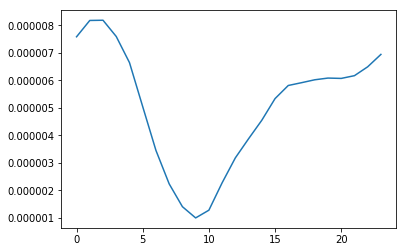

In [12]:
meanhour=[]
for i in hourcsv.columns:
    if i != 'tract':
        meanhour.append(np.mean(output[i]/output['total_tweets']))
plt.plot(meanhour) 
# 0 is 12AM - 23 is 11PM
print('There are alot of tweets that occurred at night and after noon')

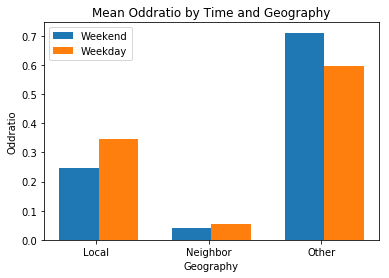

In [13]:
n = np.arange(3)
bar_width = 0.35
plt.bar(n, [np.mean(output['local_weekend_oddratio']),
          np.mean(output['neighbor_weekend_oddratio']),
          np.mean(output['other_weekend_oddratio'])], bar_width, 
            label = "Weekend" )
plt.bar(n + bar_width, [np.mean(output['local_weekday_oddratio']), 
          np.mean(output['neighbor_weekday_oddratio']),
          np.mean(output['other_weekday_oddratio'])], bar_width,
       label = 'Weekday')
plt.xlabel("Geography")
plt.ylabel("Oddratio")
plt.xticks(n+ 0.15, ['Local', 'Neighbor', 'Other'])
plt.title("Mean Oddratio by Time and Geography")
plt.legend();

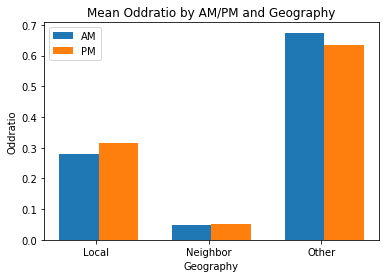

In [14]:
n = np.arange(3)
bar_width = 0.35
plt.bar(n, [np.mean(output['local_daytime_oddratio']),
          np.mean(output['neighbor_daytime_oddratio']),
          np.mean(output['other_daytime_oddratio'])], bar_width, 
            label = "AM" )
plt.bar(n + bar_width, [np.mean(output['local_nighttime_oddratio']), 
          np.mean(output['neighbor_nighttime_oddratio']),
          np.mean(output['other_nighttime_oddratio'])], bar_width,
       label = 'PM')
plt.xlabel("Geography")
plt.ylabel("Oddratio")
plt.xticks(n+ 0.15, ['Local', 'Neighbor', 'Other'])
plt.title("Mean Oddratio by AM/PM and Geography")
plt.legend();


# NON NEIGHBOR ANALYSIS on POWER USERS

We will be working with file2 on using only power users of the NY dataset. Below are the codes if you need to rerun them again if you started on this section without doing the sections above.

In [ ]:
# ds = das.read_csv(file2)
#ds = ds.rename(columns = {'ny_with_homeloc.csv': 'id'})
# ds = ds.dropna(subset = ['home_tract'])
# ds = ds.dropna(subset= ['tract'])
# ds['tract'] = ds['tract'].astype('int')
# ds['home_tract'] = ds['home_tract'].astype('int')

This function create_csv will groupby tract and demographic variable such as nonwhite and income level. It will categorize and pivot table it so that the demographic variables will be column names. In each cell, there will be the number of tweets with the demographic variable condition for that tract. It will then convert the dataframe to a csv. We will use all the csvs and compile it to one csv output file later.

In [11]:
def create_csv(demo_variable):
    g = other.groupby(['tract', demo_variable]).aggregate(
        {'u_id': 'count'}).reset_index()
    g = g.categorize(columns = demo_variable)
    g = g.pivot_table(values = 'u_id',
                      columns = demo_variable, 
                      index = 'tract')
    g.to_csv('NY_' + demo_variable + '_*.csv')

In [47]:
demo_var = pd.read_csv('NY_demo_variables_dummies.csv')

In [13]:
demo_var = demo_var.rename(columns = {'GEOid2': 'home_tract'})

In [14]:
#The values in the demo_var were True and False so we will convert it into numbers
#so it will be easier to calculate.
demo_var['LI_under80'] = demo_var['LI_under80'].apply(lambda x: 1 if x == True else 0)
demo_var['LI_above120'] =demo_var['LI_above120'].apply(lambda x: 1 if x == True else 0)
demo_var['MI_80_120']= demo_var['MI_80_120'].apply(lambda x: 1 if x == True else 0)
demo_var['aboverm_per_col16']= demo_var['aboverm_per_col16'].apply(lambda x: 1 if x == True else 0)
demo_var['aboverm_per_nonwhite'] = demo_var['aboverm_per_nonwhite'].apply(lambda x: 1 if x == True else 0)

Disclaimer: Some tracts do not have a Low, Middle, or High Income coding so it's all marked as 0. Thus, the total tweets will be counted beforehand.

In [26]:
#Joining the non-neighbor table with the home tract variables csv (demo_var)
other = other.merge(demo_var, on = 'home_tract', how = 'inner')

In [43]:
#Here we count the total tweets in each tract
other_count = other.groupby(['tract']).aggregate({'u_id': 'count'})
other_count = other_count.reset_index()
other_count = other_count.rename(columns = {'u_id': 'other_tweets'})
other_count.to_csv('ny_demo_one_user_countp2_*.csv')

['ny_demo_one_user_countp2_0.csv']

In [25]:
%%time
create_csv('LI_under80')

CPU times: user 3h 22min 7s, sys: 18min 49s, total: 3h 40min 56s
Wall time: 3h 7min 1s


In [26]:
%%time
create_csv('LI_above120')

CPU times: user 2h 59min 1s, sys: 11min 46s, total: 3h 10min 48s
Wall time: 2h 52min 9s


In [27]:
%%time
create_csv('MI_80_120')

CPU times: user 3h 11min 3s, sys: 16min 27s, total: 3h 27min 31s
Wall time: 2h 58min 20s


In [30]:
%%time
create_csv('aboverm_per_col16')

CPU times: user 3h 19min 19s, sys: 18min 36s, total: 3h 37min 56s
Wall time: 3h 9min 56s


In [29]:
%%time
create_csv('aboverm_per_nonwhite')

CPU times: user 3h 13min 7s, sys: 19min 17s, total: 3h 32min 24s
Wall time: 2h 57min 55s


In [64]:
under80 = pd.read_csv('NY_LI_under80_0.csv') # 0 and 1
above120 = pd.read_csv('NY_LI_above120_0.csv') # 0 and 1
MI = pd.read_csv('NY_MI_80_120_0.csv') # 0 and 1
col15 = pd.read_csv('NY_aboverm_per_col16_0.csv') # 0 and 1
nonwhite = pd.read_csv('NY_aboverm_per_nonwhite_0.csv') # 0 and 1


In [65]:
MI = MI[['tract', '1']].rename({'1': 'ct_othertweets_MI_80_120AMI'}, axis =1)
above120 = above120[['tract', '1']].rename({'1': 'ct_othertweets_HI_above_120AMI'}, axis =1)
under80 = under80[['tract', '1']].rename({'1': 'ct_othertweets_LI_under80AMI'}, axis =1)
nonwhite = nonwhite.rename({'1': 'ct_othertweets_aboverm_per_nonwhite',
                     '0': 'ct_othertweets_underm_per_nonwhite'}, axis = 1)
col15 = col15.rename({'1': 'ct_othertweets_aboverm_per_col',
                     '0': 'ct_othertweets_underm_per_col'}, axis =1)

In [66]:
twitter_demo_ny = MI.merge(above120, on = 'tract', how = 'inner').merge(
under80, on = 'tract', how = 'inner').merge(
nonwhite, on = 'tract', how = 'inner').merge(
col15, on = 'tract', how = 'inner').merge(
pd.read_csv('ny_demo_one_user_count_0.csv'), on = 'tract', how = 'inner')
twitter_demo_ny= twitter_demo_ny.fillna(0)
# twitter_demo_ny['total_nonneighbortweets'] = twitter_demo_ny['ct_othertweets_HI_above_120AMI'] + twitter_demo_ny['ct_othertweets_LI_under80AMI'] + twitter_demo_ny['ct_othertweets_MI_80_120AMI']

In [67]:
for i in twitter_demo_ny.columns:
    if i not in ['Unnamed: 0', 'other_tweets', 'tract']:
        twitter_demo_ny['%_'+ i[2:len(i)]] = twitter_demo_ny[i]/twitter_demo_ny['other_tweets']

In [70]:
twitter_demo_ny.to_csv('Twitter_NN_NewYork_demog_11_20.csv')

In [3]:
new = pd.read_csv('Twitter_NN_NewYork_demog_11_20.csv')

In [73]:
twitter_demo_ny

,tract,ct_othertweets_MI_80_120AMI,ct_othertweets_HI_above_120AMI,ct_othertweets_LI_under80AMI,ct_othertweets_underm_per_nonwhite,ct_othertweets_aboverm_per_nonwhite,ct_othertweets_underm_per_col,ct_othertweets_aboverm_per_col,Unnamed: 0,other_tweets,%__othertweets_MI_80_120AMI,%__othertweets_HI_above_120AMI,%__othertweets_LI_under80AMI,%__othertweets_underm_per_nonwhite,%__othertweets_aboverm_per_nonwhite,%__othertweets_underm_per_col,%__othertweets_aboverm_per_col,sum
0,9001010101,205.0,359.0,160.0,497.0,267.0,266.0,498.0,0,764,0.268325,0.469895,0.209424,0.650524,0.349476,0.348168,0.651832,1.0
1,9001010201,166.0,299.0,201.0,336.0,336.0,282.0,390.0,1,672,0.247024,0.444940,0.299107,0.500000,0.500000,0.419643,0.580357,1.0
2,9001010202,191.0,226.0,51.0,262.0,210.0,80.0,392.0,2,472,0.404661,0.478814,0.108051,0.555085,0.444915,0.169492,0.830508,1.0
3,9001010300,283.0,851.0,298.0,1003.0,517.0,475.0,1045.0,3,1520,0.186184,0.559868,0.196053,0.659868,0.340132,0.312500,0.687500,1.0
4,9001010400,363.0,340.0,299.0,592.0,442.0,455.0,579.0,4,1034,0.351064,0.328820,0.289168,0.572534,0.427466,0.440039,0.559961,1.0
5,9001010500,839.0,1675.0,813.0,1994.0,1414.0,1145.0,2263.0,5,3408,0.246185,0.491491,0.238556,0.585094,0.414906,0.335974,0.664026,1.0
6,9001010600,1322.0,2544.0,964.0,2873.0,2056.0,1611.0,3318.0,6,4929,0.268209,0.516129,0.195577,0.582877,0.417123,0.326841,0.673159,1.0
7,9001010700,350.0,725.0,266.0,790.0,599.0,522.0,867.0,7,1389,0.251980,0.521958,0.191505,0.568754,0.431246,0.375810,0.624190,1.0
8,9001010800,431.0,790.0,416.0,1046.0,624.0,619.0,1051.0,8,1670,0.258084,0.473054,0.249102,0.626347,0.373653,0.370659,0.629341,1.0
9,9001010900,306.0,312.0,274.0,441.0,466.0,344.0,563.0,9,907,0.337376,0.343991,0.302095,0.486218,0.513782,0.379272,0.620728,1.0


In [12]:
#checking if the 31 counties are in the power user file
counties = ['36027', '36071', '36079', '36103', '36105', '36111',
            '34019', '34021', '34029', '34029', '34037', '34041']

In [13]:
#counting the number of tweets in each counties.
ds['county'] = ds['tract'].apply(lambda x: str(x)[0:5] if str(x)[0] != '9' else str(x)[0:4])
ds.groupby('county').aggregate({'id':'count'}).reset_index().to_csv('test_countfull_*.csv')

/usr/local/linux/anaconda3/lib/python3.5/site-packages/dask/dataframe/core.py:2184: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)


['test_countfull_0.csv']